# BUAN 6342 Natural Language Processing - Mid-Term Project

# NLTK

# Import the Libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import sklearn
import string

# Import the CSV File

In [2]:
df = pd.read_csv('headlines.csv')
print(df.head())

       id                                           headline
0  524288  For Some, The Decision To Enlist Offers Direction
1  524289          Whither The Astronauts Without A Shuttle?
2  524292      Tour Winner May Not Be First Over Finish Line
3  262153  California College Students Walk Out Of Class ...
4  524298               New Theory On 'Shaken Baby Syndrome'


# Text Preprocessing

# Tokenization

In [4]:
from nltk.tokenize import word_tokenize

headlines = df['headline']
tokenized_headlines = [word_tokenize(headline) for headline in headlines]

print(tokenized_headlines)

[['For', 'Some', ',', 'The', 'Decision', 'To', 'Enlist', 'Offers', 'Direction'], ['Whither', 'The', 'Astronauts', 'Without', 'A', 'Shuttle', '?'], ['Tour', 'Winner', 'May', 'Not', 'Be', 'First', 'Over', 'Finish', 'Line'], ['California', 'College', 'Students', 'Walk', 'Out', 'Of', 'Class', 'To', 'Protest', 'Tuition', 'Hikes'], ['New', 'Theory', 'On', "'Shaken", 'Baby', 'Syndrome', "'"], ['In', 'Old', 'Age', ',', 'Illness', 'And', 'Dying', 'Can', 'Be', 'Postponed'], ['Reading', 'The', 'Declaration', 'Of', 'Independence', 'Aloud'], ['Searching', 'History', 'For', 'The', 'Hot', 'Dog', "'s", 'Origin'], ['Graffiti', 'Reclaims', 'Egypt', "'s", 'Revolution', 'From', 'Marketers'], ['King', "'s", 'Memorial', 'Takes', 'Shape', 'Near', 'His', "'Dream", "'", 'Spot'], ['Shell', 'Game', ':', '2,000', 'Firms', 'Based', 'In', 'One', 'Simple', 'House'], ['Abortion', 'Wars', ':', 'Taking', 'It', 'To', 'The', 'States'], ['Minnesota', 'Shutdown', 'Hits', 'Vulnerable', 'First'], ['Political', 'Gridlock', 'R

# Stop Words Removal

In [6]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

filtered_headlines = []
for headline_tokens in tokenized_headlines:
    filtered_tokens = [word for word in headline_tokens if word.lower() not in stop_words and word not in punctuation]
    filtered_headline = ' '.join(filtered_tokens)
    filtered_headlines.append(filtered_headline)

df['Filtered_Headline'] = filtered_headlines

print(df[['Filtered_Headline']])

                                      Filtered_Headline
0                      Decision Enlist Offers Direction
1                    Whither Astronauts Without Shuttle
2                     Tour Winner May First Finish Line
3     California College Students Walk Class Protest...
4                      New Theory 'Shaken Baby Syndrome
...                                                 ...
9993               Mammogram Debate Differences n't Big
9994  Insys Files Chapter 11 Days Landmark Opioid Se...
9995  U.S Threatened Fine Yahoo 250K Day n't Release...
9996  Opioid-Maker Insys Admits Bribing Doctors Agre...
9997  Opioid Executive John Kapoor Found Guilty Land...

[9998 rows x 1 columns]


# Stemming

In [7]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

stemmed_headlines = []
for headline_tokens in filtered_headlines:
    stemmed_tokens = [porter_stemmer.stem(word) for word in word_tokenize(headline_tokens)]
    stemmed_headline = ' '.join(stemmed_tokens)
    stemmed_headlines.append(stemmed_headline)

df['Stemmed_Headlines'] = stemmed_headlines

print(df[['Stemmed_Headlines']])

                                      Stemmed_Headlines
0                             decis enlist offer direct
1                      whither astronaut without shuttl
2                     tour winner may first finish line
3     california colleg student walk class protest t...
4                       new theori 'shaken babi syndrom
...                                                 ...
9993                     mammogram debat differ n't big
9994  insi file chapter 11 day landmark opioid settl...
9995  u. threaten fine yahoo 250k day n't releas use...
9996  opioid-mak insi admit bribe doctor agre pay 22...
9997  opioid execut john kapoor found guilti landmar...

[9998 rows x 1 columns]


# Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_headlines = []
for headline_tokens in filtered_headlines:
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(headline_tokens)]
    lemmatized_headline = ' '.join(lemmatized_tokens)
    lemmatized_headlines.append(lemmatized_headline)

df['Lammatized_Headlines'] = lemmatized_headlines

print(df[['Lammatized_Headlines']])

                                   Lammatized_Headlines
0                      Decision Enlist Offers Direction
1                    Whither Astronauts Without Shuttle
2                     Tour Winner May First Finish Line
3     California College Students Walk Class Protest...
4                      New Theory 'Shaken Baby Syndrome
...                                                 ...
9993               Mammogram Debate Differences n't Big
9994  Insys Files Chapter 11 Days Landmark Opioid Se...
9995  U.S Threatened Fine Yahoo 250K Day n't Release...
9996  Opioid-Maker Insys Admits Bribing Doctors Agre...
9997  Opioid Executive John Kapoor Found Guilty Land...

[9998 rows x 1 columns]


# Part-of-Speech (POS) Tagging

In [9]:
#nltk.download('averaged_perceptron_tagger')

pos_tagged_headlines = []
for lemmatized_tokens in lemmatized_headlines:
    pos_tags = nltk.pos_tag(word_tokenize(lemmatized_tokens))
    pos_tagged_headlines.append(pos_tags)

df['POS_Tagged_Headlines'] = pos_tagged_headlines

print(df[['POS_Tagged_Headlines']])


                                   POS_Tagged_Headlines
0     [(Decision, NNP), (Enlist, NNP), (Offers, NNP)...
1     [(Whither, NNP), (Astronauts, NNP), (Without, ...
2     [(Tour, NNP), (Winner, NNP), (May, NNP), (Firs...
3     [(California, NNP), (College, NNP), (Students,...
4     [(New, NNP), (Theory, NNP), ('Shaken, POS), (B...
...                                                 ...
9993  [(Mammogram, NNP), (Debate, NNP), (Differences...
9994  [(Insys, NNP), (Files, NNP), (Chapter, NNP), (...
9995  [(U.S, NNP), (Threatened, VBD), (Fine, NNP), (...
9996  [(Opioid-Maker, NNP), (Insys, NNP), (Admits, N...
9997  [(Opioid, NNP), (Executive, NNP), (John, NNP),...

[9998 rows x 1 columns]


# Named Entity Recognition (NER)

In [10]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

ner_tagged_headlines = []
for pos_tags in pos_tagged_headlines:
    ner_tags = nltk.ne_chunk(pos_tags)
    ner_tagged_headlines.append(ner_tags)

df['NER_Headlines'] = ner_tagged_headlines

print(df[['NER_Headlines']])


                                          NER_Headlines
0     [(Decision, NNP), (Enlist, NNP), (Offers, NNP)...
1     [[(Whither, NNP)], [(Astronauts, NNP), (Withou...
2     [(Tour, NNP), (Winner, NNP), (May, NNP), (Firs...
3     [[(California, NNP)], [(College, NNP)], (Stude...
4     [[(New, NNP)], (Theory, NNP), ('Shaken, POS), ...
...                                                 ...
9993  [[(Mammogram, NNP)], [(Debate, NNP), (Differen...
9994  [[(Insys, NNP)], [(Files, NNP)], (Chapter, NNP...
9995  [[(U.S, NNP)], (Threatened, VBD), [(Fine, NNP)...
9996  [(Opioid-Maker, NNP), (Insys, NNP), (Admits, N...
9997  [[(Opioid, NNP)], (Executive, NNP), [(John, NN...

[9998 rows x 1 columns]


# CountVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

count_vector = np.array(df['Lammatized_Headlines'])

X_counts = count_vectorizer.fit_transform(count_vector)

print(np.column_stack([count_vector, X_counts.toarray()]))

[['Decision Enlist Offers Direction' 0 0 ... 0 0 0]
 ['Whither Astronauts Without Shuttle' 0 0 ... 0 0 0]
 ['Tour Winner May First Finish Line' 0 0 ... 0 0 0]
 ...
 ["U.S Threatened Fine Yahoo 250K Day n't Release User Data" 0 0 ... 0 0
  0]
 ['Opioid-Maker Insys Admits Bribing Doctors Agrees Pay 225 Million Settlement'
  0 0 ... 0 0 0]
 ['Opioid Executive John Kapoor Found Guilty Landmark Bribery Case' 0 0
  ... 0 0 0]]


In [17]:
vectorizer = CountVectorizer()
count = count_vectorizer.fit_transform(df['Lammatized_Headlines'])

print(count)

  (0, 2785)	1
  (0, 3606)	1
  (0, 7340)	1
  (0, 3070)	1
  (1, 11745)	1
  (1, 791)	1
  (1, 11821)	1
  (1, 9734)	1
  (2, 10941)	1
  (2, 11793)	1
  (2, 6539)	1
  (2, 4114)	1
  (2, 4095)	1
  (2, 6203)	1
  (3, 1634)	1
  (3, 2140)	1
  (3, 10364)	1
  (3, 11582)	1
  (3, 2032)	1
  (3, 8305)	1
  (3, 11112)	1
  (3, 5012)	1
  (4, 7143)	1
  (4, 10775)	1
  (4, 9601)	1
  :	:
  (9995, 11371)	1
  (9995, 4090)	1
  (9995, 10812)	1
  (9995, 11909)	1
  (9995, 99)	1
  (9996, 3204)	1
  (9996, 6730)	1
  (9996, 9577)	1
  (9996, 313)	1
  (9996, 7716)	1
  (9996, 397)	1
  (9996, 6402)	1
  (9996, 7412)	1
  (9996, 5483)	1
  (9996, 92)	1
  (9996, 1447)	1
  (9997, 1742)	1
  (9997, 4760)	1
  (9997, 3762)	1
  (9997, 5699)	1
  (9997, 1446)	1
  (9997, 4285)	1
  (9997, 7412)	1
  (9997, 5972)	1
  (9997, 5788)	1


# TF-IDF vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()

X_tfidf = tfidf_vectorizer.fit_transform(X_counts)

print(np.column_stack([count_vector, X_tfidf.toarray()]))

[['Decision Enlist Offers Direction' 0.0 0.0 ... 0.0 0.0 0.0]
 ['Whither Astronauts Without Shuttle' 0.0 0.0 ... 0.0 0.0 0.0]
 ['Tour Winner May First Finish Line' 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 ["U.S Threatened Fine Yahoo 250K Day n't Release User Data" 0.0 0.0 ...
  0.0 0.0 0.0]
 ['Opioid-Maker Insys Admits Bribing Doctors Agrees Pay 225 Million Settlement'
  0.0 0.0 ... 0.0 0.0 0.0]
 ['Opioid Executive John Kapoor Found Guilty Landmark Bribery Case' 0.0
  0.0 ... 0.0 0.0 0.0]]


In [19]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=count_vectorizer.get_feature_names_out())

top_50_words = tfidf_df.sum().sort_values(ascending=False).head(50)

print("Top 50 words with highest TF-IDF scores:")

print(top_50_words)

Top 50 words with highest TF-IDF scores:
new           99.104474
obama         90.033156
trump         73.643014
says          66.891636
may           51.534034
house         50.699401
health        50.384744
ebola         48.460408
gop           44.981325
japan         42.849067
libya         42.011912
court         40.281518
president     40.183366
china         39.104067
could         38.301293
world         38.185537
egypt         37.132643
law           35.373623
war           34.499287
fight         34.332184
women         34.228994
protests      31.186512
case          31.103737
nuclear       31.026042
care          31.025308
white         30.951403
deal          30.893599
state         30.773203
debate        30.685981
say           30.672045
year          30.269860
back          30.225078
death         29.983865
gadhafi       29.841875
protesters    29.497257
one           29.109017
life          28.987471
time          28.662579
big           28.542301
plan          28.472002

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lammatized_Headlines'])

print(tfidf_matrix)

  (0, 3070)	0.5562979662554438
  (0, 7340)	0.4221494306398823
  (0, 3606)	0.5562979662554438
  (0, 2785)	0.45039427581901775
  (1, 9734)	0.464831815664048
  (1, 11821)	0.40075405155561145
  (1, 791)	0.5419427919528168
  (1, 11745)	0.57413028448133
  (2, 6203)	0.4036368500195511
  (2, 4095)	0.4887714056439131
  (2, 4114)	0.3406013138324085
  (2, 6539)	0.2857665005523364
  (2, 11793)	0.4355721747569681
  (2, 10941)	0.4591132094444267
  (3, 5012)	0.4315129798214939
  (3, 11112)	0.3986865735231104
  (3, 8305)	0.3032638017667152
  (3, 2032)	0.3699808949630061
  (3, 11582)	0.3794843568051193
  (3, 10364)	0.2982740864626768
  (3, 2140)	0.31127100205710395
  (3, 1634)	0.3100408421511187
  (4, 10578)	0.49377867011666254
  (4, 899)	0.4227031899453568
  (4, 9601)	0.5029888923216793
  :	:
  (9995, 4090)	0.3716984270806814
  (9995, 11371)	0.38960079506731216
  (9995, 2722)	0.2902002463690853
  (9995, 2737)	0.25901877882224755
  (9995, 8772)	0.30368366222239507
  (9996, 1447)	0.3679104803284287
  (9

# Text Summarization

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

sentence_similarity_matrixn = cosine_similarity(tfidf_matrix, tfidf_matrix)
num_sentencesn = sentence_similarity_matrixn.shape[0]
scoresn = np.zeros(num_sentencesn)
for i in range(num_sentencesn):
    for j in range(num_sentencesn):
        if i != j:
            scoresn[i] += sentence_similarity_matrixn[i][j]
ranked_sentences_nltk = sorted(((scoresn[i], sentence) for i, sentence in enumerate(df['headline'])), reverse=True)
top_sentences_nltk = []
seen_sentences_nltk = set()
for score, sentence in ranked_sentences_nltk:
    if sentence not in seen_sentences_nltk:
        top_sentences_nltk.append(sentence)
        seen_sentences_nltk.add(sentence)

    if len(top_sentences_nltk) == 10:
        break
for sentence in top_sentences_nltk:
    print(sentence)

A New White House Social Secretary, And A New First
What Obama Should Say And Do About Ebola
ElBaradei Back In Egypt; Says It's Time For A New Government
Obama Gives New Details On America's Effort To Fight Ebola
Obama Says Gadhafi 'Must Leave' Power In Libya
In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban
Clinton, Obama Attack Health Care Plans
President Obama Signs Tax-Cut Bill Into Law
In Election Ads, Democrats Silent On New Health Law
Obama Enters New Chapter As GOP-Led House Arrives


# Visualization

# Bar Chart

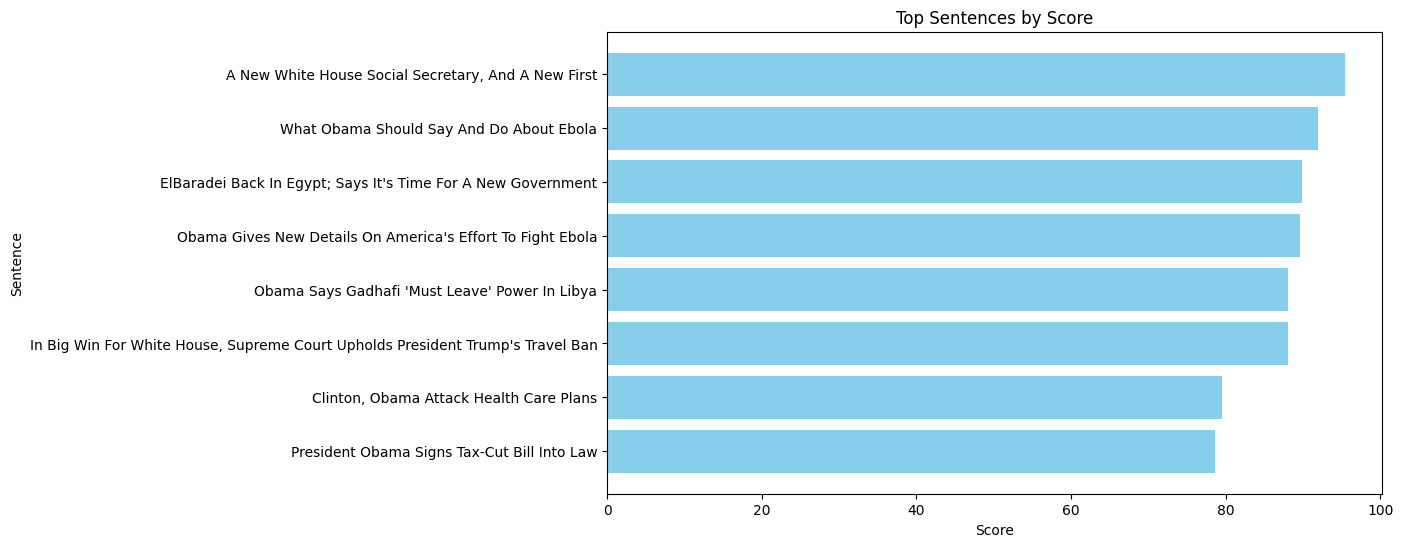

In [26]:
import matplotlib.pyplot as plt

sentences = [sentence for _, sentence in ranked_sentences_nltk[:10]]
scores = [score for score, _ in ranked_sentences_nltk[:10]]

plt.figure(figsize=(10, 6))
plt.barh(sentences, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Sentence')
plt.title('Top Sentences by Score')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()


# Word Cloud

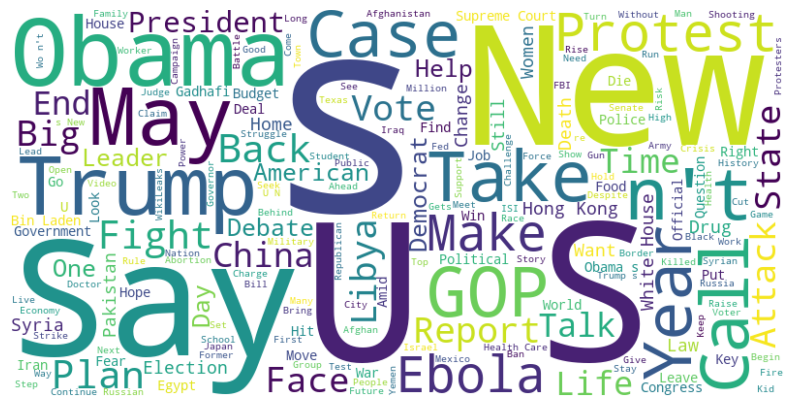

In [27]:
from wordcloud import WordCloud

text = ' '.join(df['Lammatized_Headlines'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Histogram

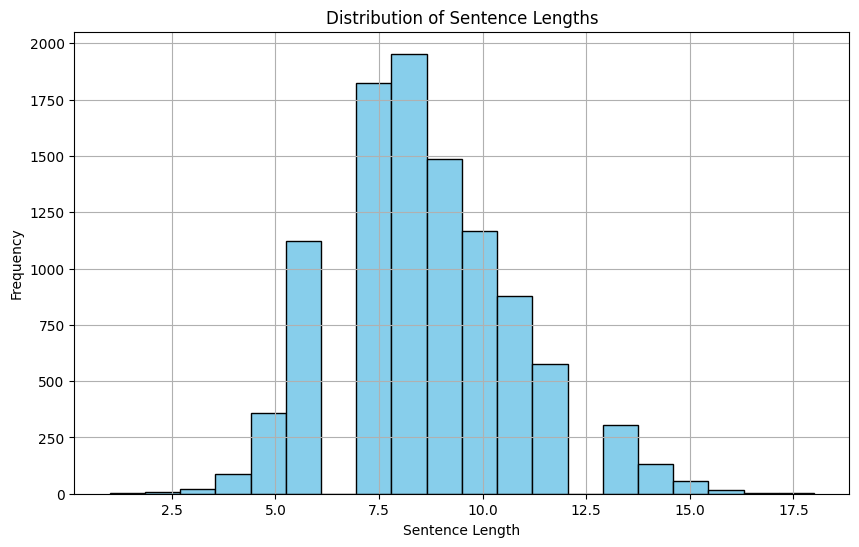

In [34]:
sentence_lengths = df['headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(True)
plt.show()


# Line Chart

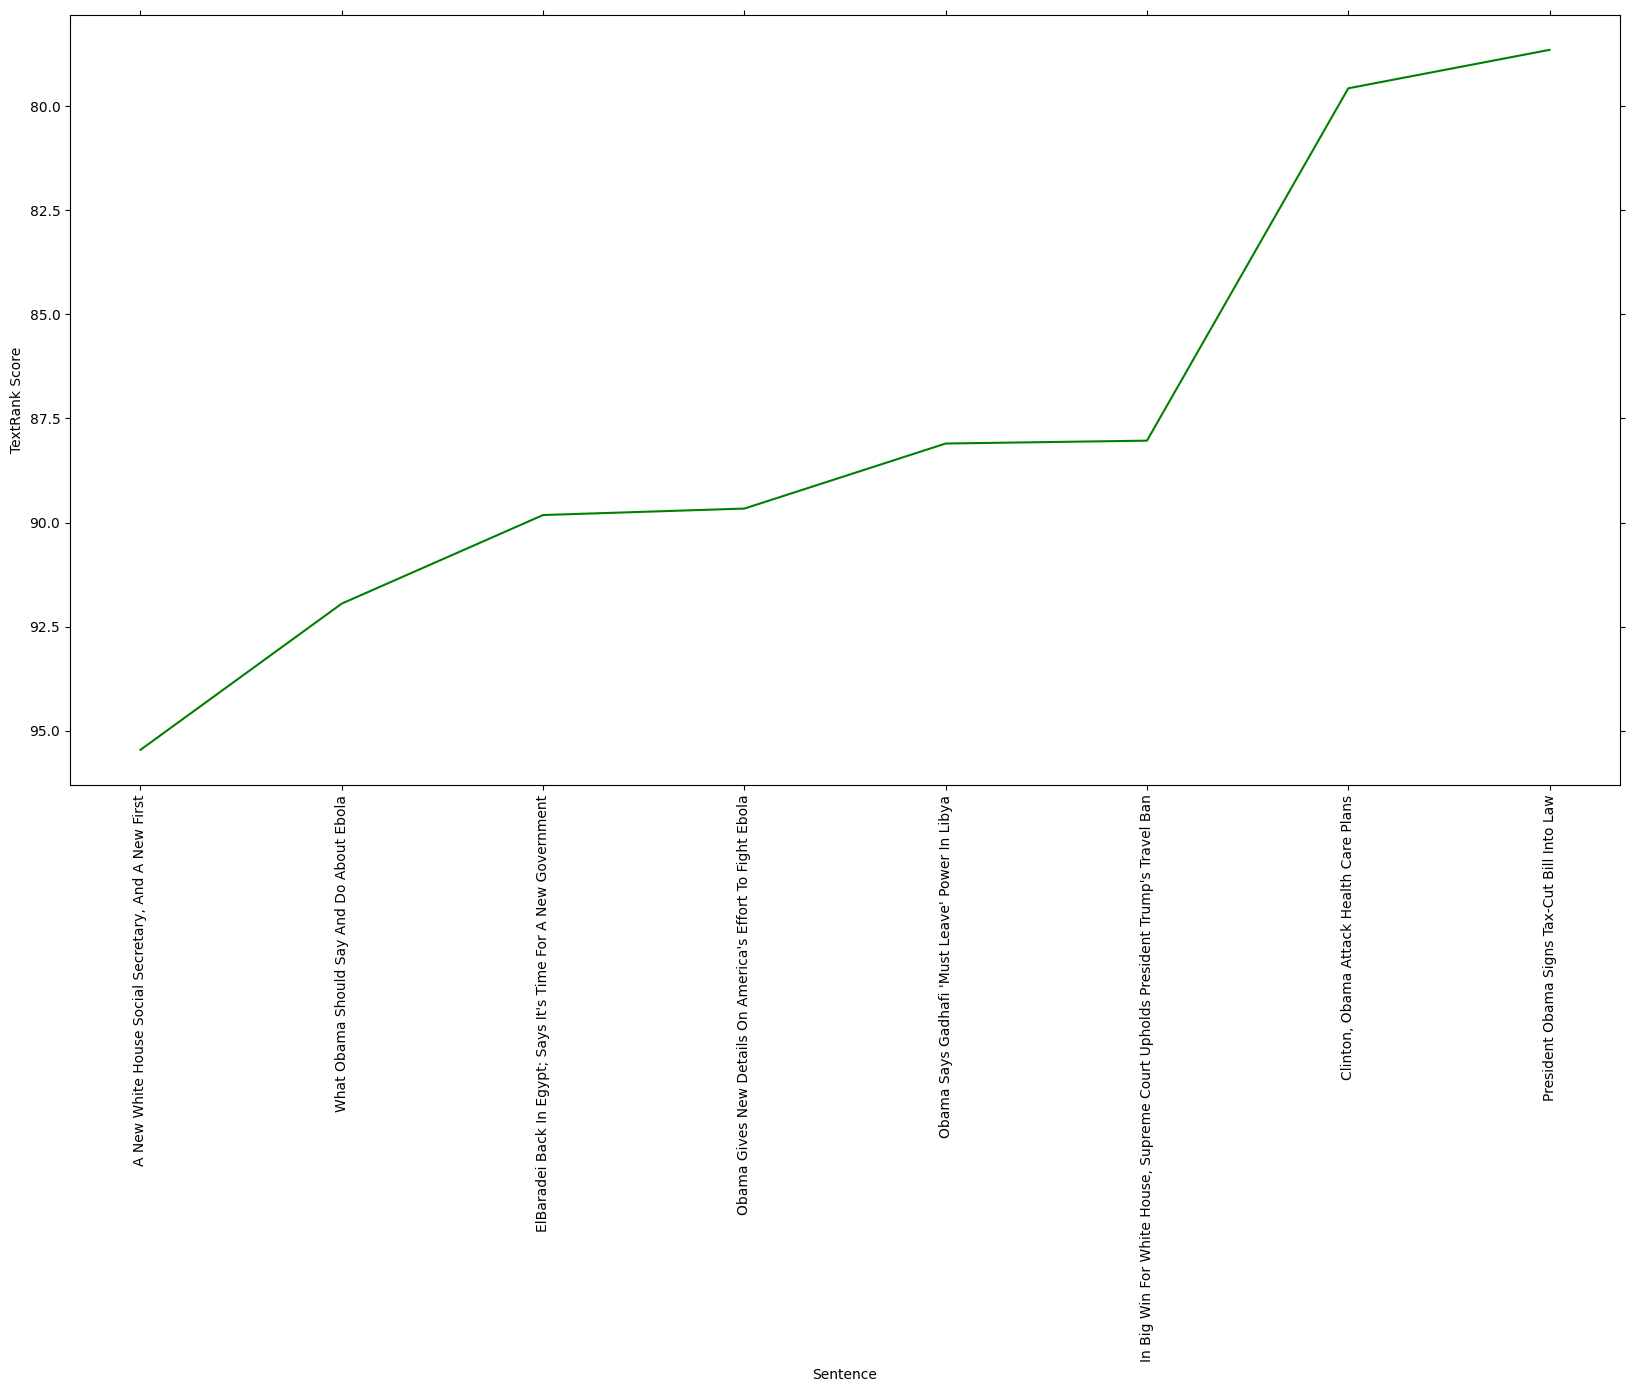

In [60]:
import matplotlib.pyplot as plt

scores, sentences = zip(*ranked_sentences_nltk[:10])
plt.figure(figsize=(20, 10))
plt.plot(sentences, scores, color='green', linewidth=1.5)
plt.xlabel('Sentence')
plt.xticks(rotation=90)
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.gca().invert_yaxis()

# Spacy

# Import the Libraries

In [36]:
import spacy

# Import the CSV File

In [37]:
df_spacy = pd.read_csv("headlines.csv")
print(df_spacy.head())

       id                                           headline
0  524288  For Some, The Decision To Enlist Offers Direction
1  524289          Whither The Astronauts Without A Shuttle?
2  524292      Tour Winner May Not Be First Over Finish Line
3  262153  California College Students Walk Out Of Class ...
4  524298               New Theory On 'Shaken Baby Syndrome'


# Text Preprocessing

# Tokenization

In [40]:
nlp = spacy.load('en_core_web_sm')
for headline in df_spacy['headline']:

    doc = nlp(headline)
    
    for token in doc:
        print(token.text)

For
Some
,
The
Decision
To
Enlist
Offers
Direction
Whither
The
Astronauts
Without
A
Shuttle
?
Tour
Winner
May
Not
Be
First
Over
Finish
Line
California
College
Students
Walk
Out
Of
Class
To
Protest
Tuition
Hikes
New
Theory
On
'
Shaken
Baby
Syndrome
'
In
Old
Age
,
Illness
And
Dying
Can
Be
Postponed
Reading
The
Declaration
Of
Independence
Aloud
Searching
History
For
The
Hot
Dog
's
Origin
Graffiti
Reclaims
Egypt
's
Revolution
From
Marketers
King
's
Memorial
Takes
Shape
Near
His
'
Dream
'
Spot
Shell
Game
:
2,000
Firms
Based
In
One
Simple
House
Abortion
Wars
:
Taking
It
To
The
States
Minnesota
Shutdown
Hits
Vulnerable
First
Political
Gridlock
Rises
,
The
Debt
Ceiling
Does
n't
Will
And
Kate
Sample
Canada
's
Native
Fare
DOJ
Orders
Second
Autopsy
Of
Teen
Shot
By
Ferguson
Police
Ferguson
Timeline
:
Grief
,
Anger
And
Tension
Ferguson
Grand
Jury
Will
Reportedly
Meet
Again
Monday
Ferguson
Police
Release
Name
Of
Officer
Who
Shot
Michael
Brown
Out
Of
The
Mouths
Of
Hosts
,
Oft
Times
,
Come
Flubs
Schoo

# Stop Words Removal

In [41]:
def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(filtered_tokens)

df_spacy['Filtered_Headline'] = df_spacy['headline'].apply(preprocess_text)

print(df_spacy['Filtered_Headline'])


0                        Decision Enlist Offers Direction
1                                      Astronauts Shuttle
2                                 Tour Winner Finish Line
3       California College Students Walk Class Protest...
4                         New Theory Shaken Baby Syndrome
                              ...                        
9993                     Mammogram Debate Differences Big
9994    Insys Files Chapter 11 Days Landmark Opioid Se...
9995    U.S. Threatened Fine Yahoo $ 250 K Day Release...
9996    Opioid Maker Insys Admits Bribing Doctors Agre...
9997    Opioid Executive John Kapoor Found Guilty Land...
Name: Filtered_Headline, Length: 9998, dtype: object


# Lemmatization

In [42]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

df_spacy['Lemmatized_Headline'] = df_spacy['Filtered_Headline'].apply(lemmatize_text)

print(df_spacy['Lemmatized_Headline'])

0                        decision Enlist Offers Direction
1                                      Astronauts Shuttle
2                                 Tour Winner Finish Line
3       California College Students walk Class Protest...
4                         New Theory Shaken Baby Syndrome
                              ...                        
9993                     Mammogram Debate Differences Big
9994    Insys Files Chapter 11 day Landmark Opioid Set...
9995    U.S. threaten Fine Yahoo $ 250 K Day Release U...
9996    opioid Maker Insys Admits Bribing doctor agree...
9997    Opioid Executive John Kapoor find Guilty Landm...
Name: Lemmatized_Headline, Length: 9998, dtype: object


# POS Tagging

In [43]:
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df_spacy['Pos_Tags'] = df_spacy['Lemmatized_Headline'].apply(pos_tagging)

print(df_spacy['Pos_Tags'])

0       [(decision, NOUN), (Enlist, PROPN), (Offers, P...
1                 [(Astronauts, PROPN), (Shuttle, PROPN)]
2       [(Tour, PROPN), (Winner, PROPN), (Finish, PROP...
3       [(California, PROPN), (College, PROPN), (Stude...
4       [(New, PROPN), (Theory, PROPN), (Shaken, PROPN...
                              ...                        
9993    [(Mammogram, PROPN), (Debate, PROPN), (Differe...
9994    [(Insys, PROPN), (Files, PROPN), (Chapter, PRO...
9995    [(U.S., PROPN), (threaten, VERB), (Fine, PROPN...
9996    [(opioid, ADJ), (Maker, PROPN), (Insys, PROPN)...
9997    [(Opioid, PROPN), (Executive, PROPN), (John, P...
Name: Pos_Tags, Length: 9998, dtype: object


# Named Entity Recognition (NER)

In [45]:
def ner_tagging(text):
    doc = nlp(text)
    ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_tags

df_spacy['NER_Tags'] = df_spacy['Lemmatized_Headline'].apply(ner_tagging)

print(df_spacy['NER_Tags'])

0                        [(Enlist Offers Direction, ORG)]
1                          [(Astronauts Shuttle, PERSON)]
2                                 [(Tour Winner, PERSON)]
3                    [(California College Students, ORG)]
4                                                      []
                              ...                        
9993                                                   []
9994    [(Insys Files Chapter, ORG), (Landmark Opioid ...
9995    [(U.S., GPE), (Fine Yahoo, PERSON), (250, MONEY)]
9996             [(Bribing, GPE), ($ 225 million, MONEY)]
9997    [(Opioid, ORG), (John Kapoor, PERSON), (Guilty...
Name: NER_Tags, Length: 9998, dtype: object


# Spacy Pipeline Object

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < 0.05:
        return 'negative'
    else:
        return 'neutral'
    
df_spacy['sentiment'] = df_spacy['headline'].apply(get_sentiment_scores)

df_spacy.head()

,id,headline,Filtered_Headline,Lemmatized_Headline,Pos_Tags,NER_Tags,sentiment
0,524288,"For Some, The Decision To Enlist Offers Direction",Decision Enlist Offers Direction,decision Enlist Offers Direction,"[(decision, NOUN), (Enlist, PROPN), (Offers, P...","[(Enlist Offers Direction, ORG)]",negative
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle,Astronauts Shuttle,"[(Astronauts, PROPN), (Shuttle, PROPN)]","[(Astronauts Shuttle, PERSON)]",negative
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish Line,Tour Winner Finish Line,"[(Tour, PROPN), (Winner, PROPN), (Finish, PROP...","[(Tour Winner, PERSON)]",positive
3,262153,California College Students Walk Out Of Class ...,California College Students Walk Class Protest...,California College Students walk Class Protest...,"[(California, PROPN), (College, PROPN), (Stude...","[(California College Students, ORG)]",negative
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome,New Theory Shaken Baby Syndrome,"[(New, PROPN), (Theory, PROPN), (Shaken, PROPN...",[],negative


In [47]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(filtered_tokens)

def preprocess_dataframe(df):
    
    df['Filtered_Headline'] = df['headline'].apply(preprocess_text)
    
    processed_data = list(nlp.pipe(df['Filtered_Headline'], disable=["parser"]))
    
    lemmatized_headline = [" ".join([token.lemma_ for token in doc if not token.is_stop]) for doc in processed_data]
    
    pos_tagged_headlines = [" ".join([f"{token.text} ({token.pos_})" for token in doc]) for doc in processed_data]
    
    ner_entities = [list(doc.ents) for doc in processed_data]

    return lemmatized_headline, pos_tagged_headlines, ner_entities

df_pipeline = pd.read_csv('headlines.csv')
lemmatized_headline, pos_tags_headline, ner_tags_headline = preprocess_dataframe(df_pipeline)

df_pipeline['Filtered_Headline'] = df_pipeline['Filtered_Headline']
df_pipeline['Lemmatized_Headline'] = lemmatized_headline
df_pipeline['POS_Tags_Headline'] = pos_tags_headline
df_pipeline['NER_Tags_Headline'] = ner_tags_headline

df_pipeline.head()


,id,headline,Filtered_Headline,Lemmatized_Headline,POS_Tags_Headline,NER_Tags_Headline
0,524288,"For Some, The Decision To Enlist Offers Direction",Decision Enlist Offers Direction,decision Enlist Offers Direction,Decision (NOUN) Enlist (PROPN) Offers (PROPN) ...,[]
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle,Astronauts Shuttle,Astronauts (PROPN) Shuttle (PROPN),"[(Astronauts, Shuttle)]"
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish Line,Tour Winner Finish Line,Tour (PROPN) Winner (PROPN) Finish (PROPN) Lin...,"[(Tour, Winner)]"
3,262153,California College Students Walk Out Of Class ...,California College Students Walk Class Protest...,California College Students walk Class Protest...,California (PROPN) College (PROPN) Students (P...,"[(California, College, Students, Walk)]"
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome,New Theory Shaken Baby Syndrome,New (PROPN) Theory (PROPN) Shaken (PROPN) Baby...,[]


# TfidfVectorizer and LinearSVC for text vectorization and classification

In [51]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_spacy['Lemmatized_Headline']
y = df_spacy['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])
text_clf.fit(X_train, y_train)
predictions = text_clf.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, predictions)))
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8821212121212121
[[2471   99]
 [ 290  440]]
              precision    recall  f1-score   support

    negative       0.89      0.96      0.93      2570
    positive       0.82      0.60      0.69       730

    accuracy                           0.88      3300
   macro avg       0.86      0.78      0.81      3300
weighted avg       0.88      0.88      0.88      3300



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Text Summarization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

lemmatized_headlines = df_spacy['headline']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_headlines)

cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

num_sentences = cosine_sim_matrix.shape[0]
scores = cosine_sim_matrix.sum(axis=1)

ranked_sentences = sorted(((scores[i], sentence) for i, sentence in enumerate(lemmatized_headlines)), reverse=True)

top_sentences = [sentence for score, sentence in ranked_sentences[:10]]

print("Summary:")
for sentence in top_sentences:
    print(sentence)


Summary:
Obama Says Gadhafi 'Must Leave' Power In Libya
A New White House Social Secretary, And A New First
What Obama Should Say And Do About Ebola
Obama Gives New Details On America's Effort To Fight Ebola
Obama Gives New Details On America's Effort To Fight Ebola
In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban
'We Don't Have A Strategy Yet' On Islamic State, Obama Says
ElBaradei Back In Egypt; Says It's Time For A New Government
Clinton, Obama Attack Health Care Plans
In Election Ads, Democrats Silent On New Health Law


# Visualizations

# Bar Chart

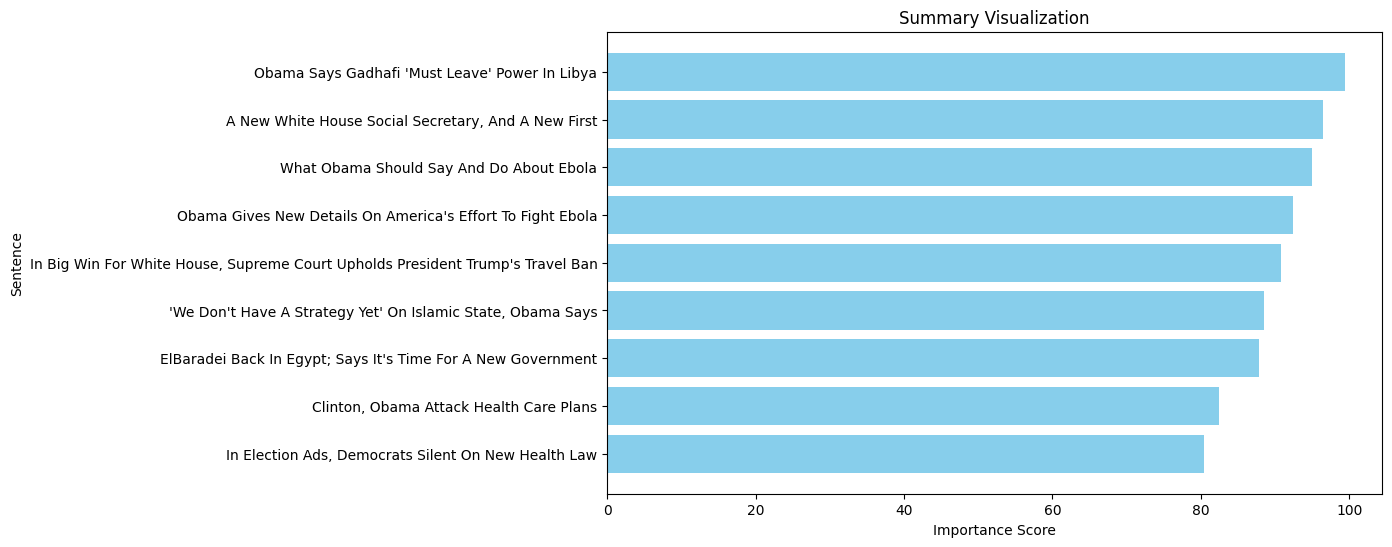

In [53]:
import matplotlib.pyplot as plt

sentences = [sentence for score, sentence in ranked_sentences[:10]]
scores = [score for score, sentence in ranked_sentences[:10]]

plt.figure(figsize=(10, 6))
plt.barh(sentences, scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Sentence')
plt.title('Summary Visualization')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important sentence at the top
plt.show()


# Word Cloud

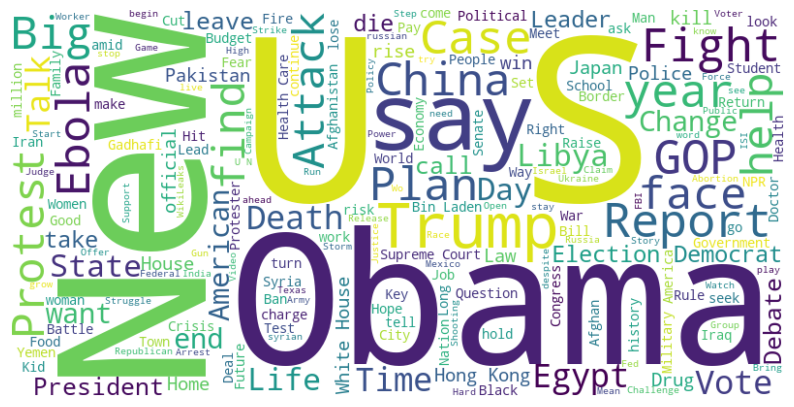

In [54]:
from wordcloud import WordCloud

text = ' '.join(df_spacy['Lemmatized_Headline'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Histogram

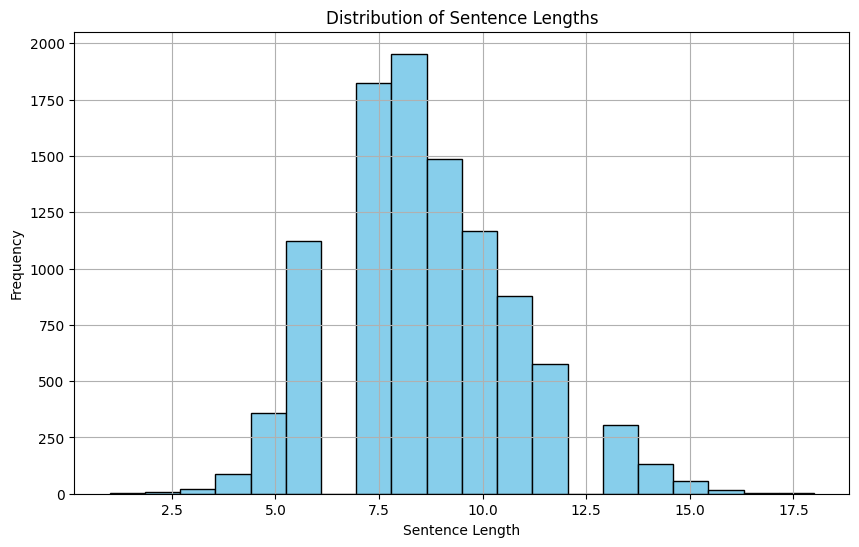

In [55]:
sentence_lengths = df_spacy['headline'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(True)
plt.show()


# Pie Chart

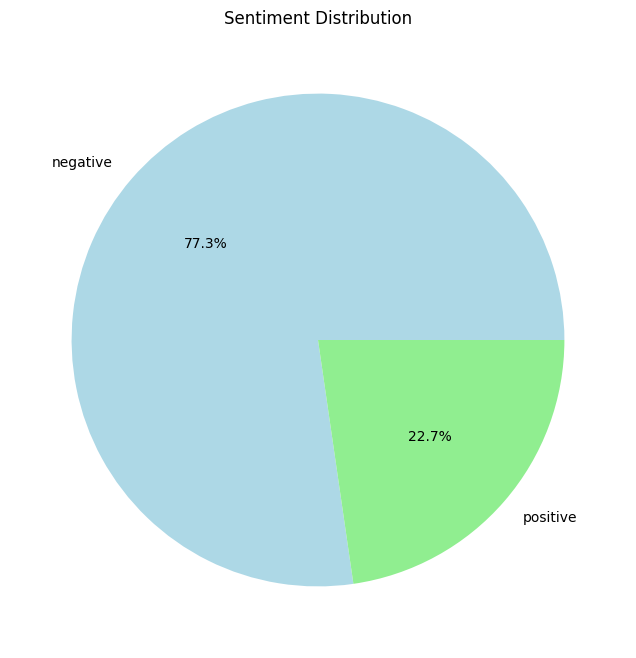

In [56]:
sentiment_counts = df_spacy['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.show()


# Line Chart

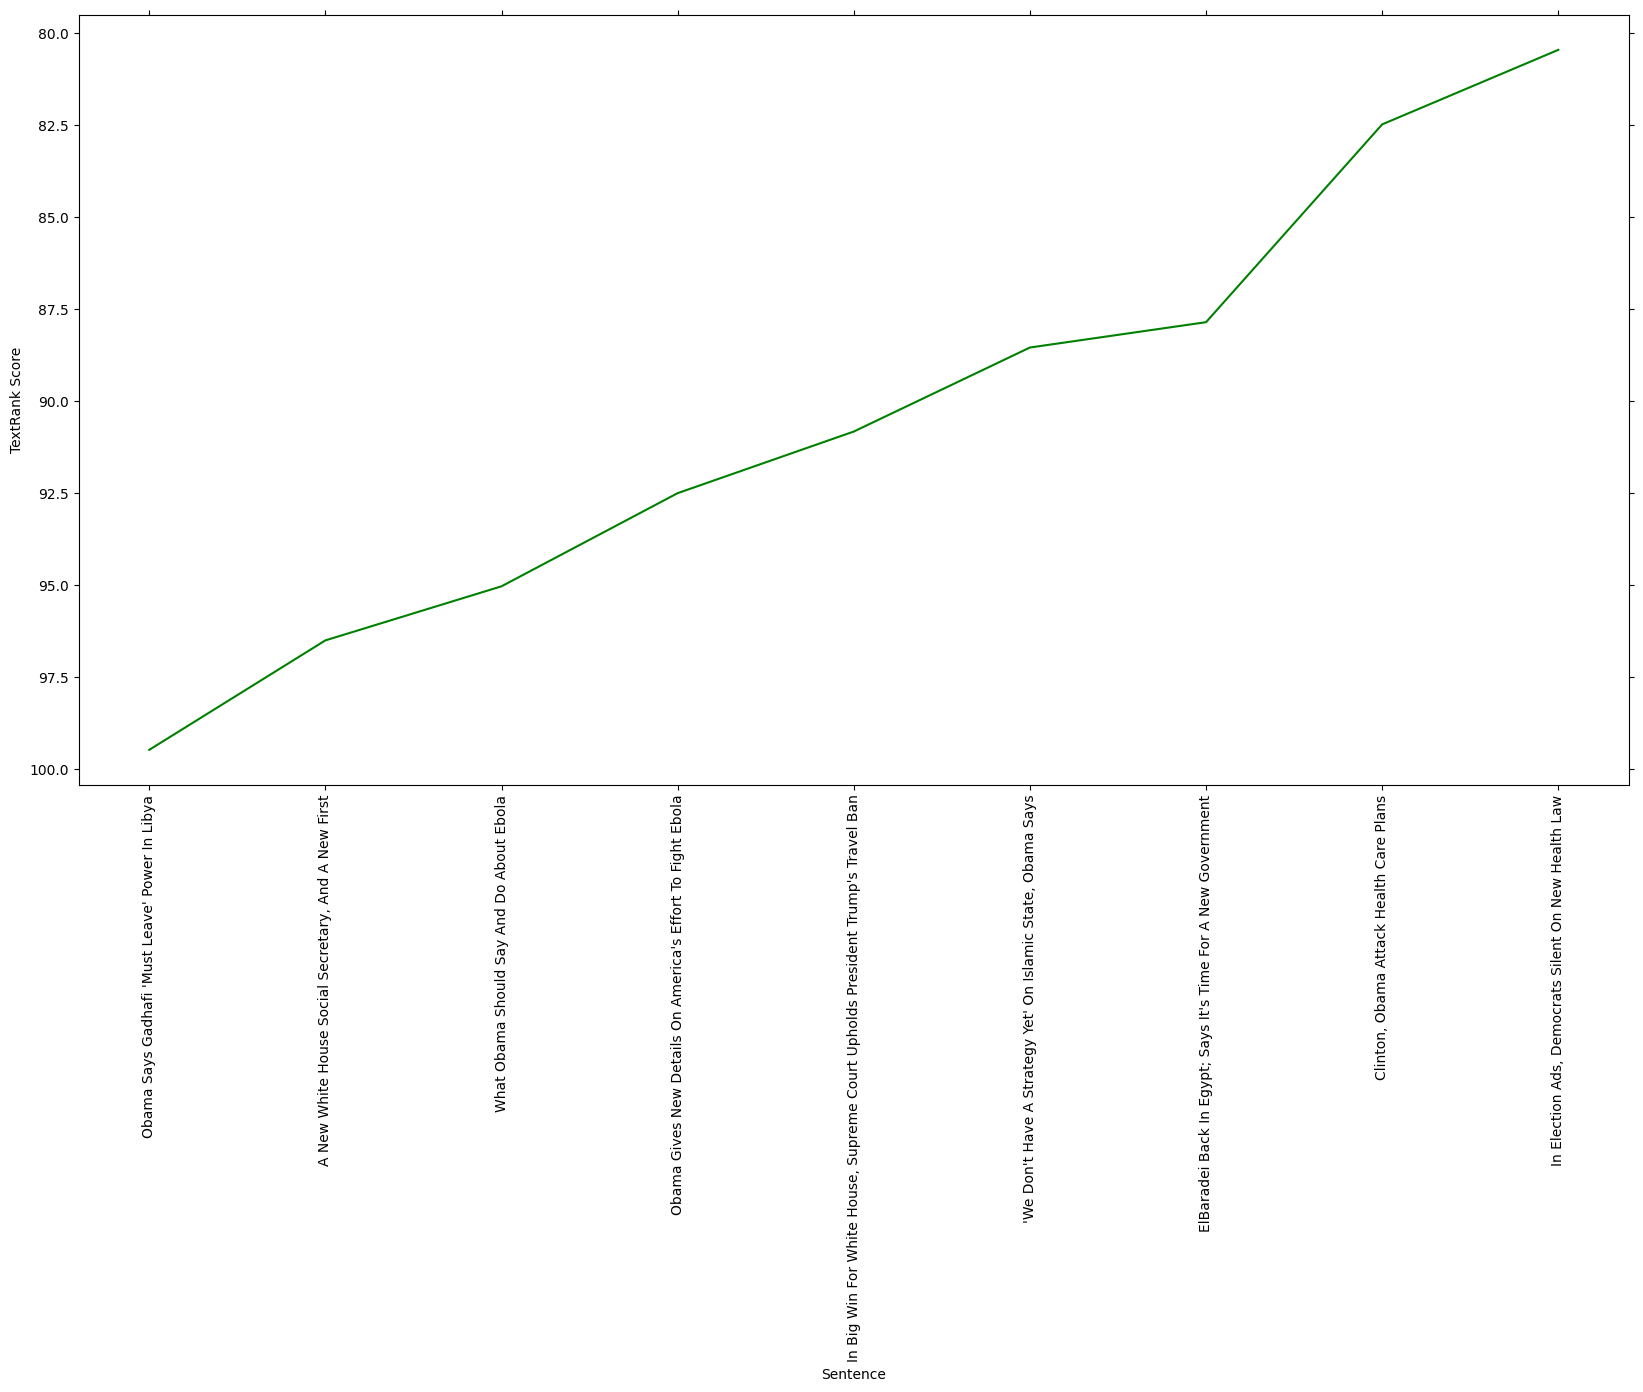

In [61]:
import matplotlib.pyplot as plt

scores, sentences = zip(*ranked_sentences[:10])
plt.figure(figsize=(20, 10))
plt.plot(sentences, scores, color='green', linewidth=1.5)
plt.xlabel('Sentence')
plt.xticks(rotation=90)
plt.ylabel('TextRank Score')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.gca().invert_yaxis()

# NLTK Vs Spacy

In [59]:
nltk_df = pd.DataFrame({'NLTK Summaries': top_sentences_nltk})
spacy_df = pd.DataFrame({'spaCy Summaries': top_sentences})

result_df = pd.concat([nltk_df, spacy_df], axis=1)

from IPython.display import display, HTML
display(HTML(result_df.to_html(index=False)))

NLTK Summaries,spaCy Summaries
"A New White House Social Secretary, And A New First",Obama Says Gadhafi 'Must Leave' Power In Libya
What Obama Should Say And Do About Ebola,"A New White House Social Secretary, And A New First"
ElBaradei Back In Egypt; Says It's Time For A New Government,What Obama Should Say And Do About Ebola
Obama Gives New Details On America's Effort To Fight Ebola,Obama Gives New Details On America's Effort To Fight Ebola
Obama Says Gadhafi 'Must Leave' Power In Libya,Obama Gives New Details On America's Effort To Fight Ebola
"In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban","In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban"
"Clinton, Obama Attack Health Care Plans","'We Don't Have A Strategy Yet' On Islamic State, Obama Says"
President Obama Signs Tax-Cut Bill Into Law,ElBaradei Back In Egypt; Says It's Time For A New Government
"In Election Ads, Democrats Silent On New Health Law","Clinton, Obama Attack Health Care Plans"
Obama Enters New Chapter As GOP-Led House Arrives,"In Election Ads, Democrats Silent On New Health Law"
